In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import numpy as np

In [2]:
sheepfile = nx.read_graphml('sheep_ml.graphml')

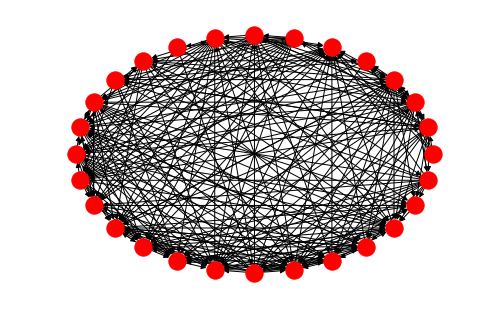

In [3]:
nx.draw_shell(sheepfile)

In [4]:
nodes = pd.read_csv('sheep_data/sheep_age.csv')
edges = pd.read_csv('sheep_data/sheep_edges.csv')

In [5]:
sheeps = nx.DiGraph()
for i in nodes.index:
    sheeps.add_node(nodes.iloc[i]['id'],age = nodes.iloc[i]['age'])

In [6]:
edges['ebunch'] = '0'
for i in edges.index.values:
    edges.at[i,'ebunch'] = (edges.iloc[i]['source'],edges.iloc[i]['target'],{'weight':edges.iloc[i]['weight']})
edges.head()

,source,target,weight,ebunch
0,1,2,1,"(1, 2, {'weight': 1})"
1,1,3,1,"(1, 3, {'weight': 1})"
2,1,4,1,"(1, 4, {'weight': 1})"
3,1,5,1,"(1, 5, {'weight': 1})"
4,1,6,1,"(1, 6, {'weight': 1})"


In [7]:
## [(edges.iloc[i]['source'],edges.iloc[i]['target'],{'weight':edges.iloc[i]['weight']}) for i in edges.index]
sheeps.add_edges_from(edges['ebunch'].values)

In [8]:
colorlist = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
colorlist2 = ['#fee090','#fdae61','#f46d43','#d73027','#a50026']
colormap = [colorlist[i-1] for i in nodes['age'].values]
colormap2 = [colorlist2[int(math.ceil(i/2)-1)] for i in nodes['age'].values]

In [12]:
pgrank = nx.pagerank(sheeps)
pgrank_invert = {i:35/pgrank[i] for i in list(pgrank.keys())}

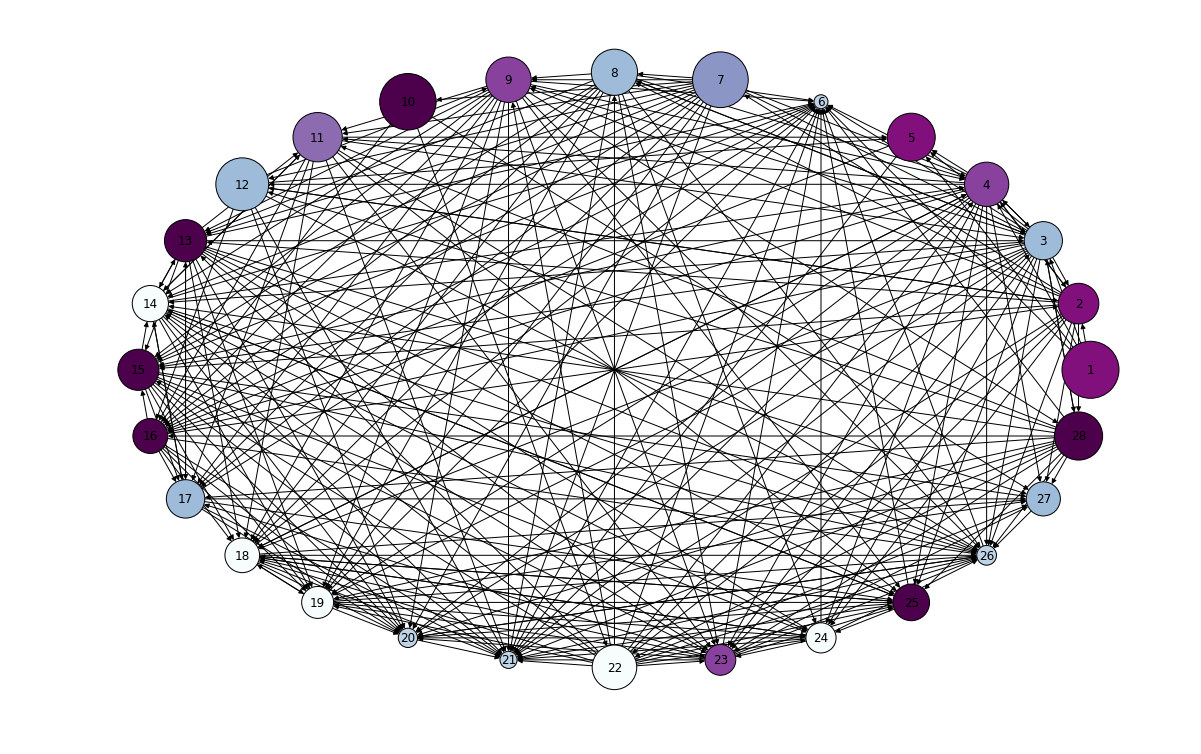

In [14]:
plt.figure(figsize = (16,10))
# plt.figure(figsize = (9,5))

# nx.draw_shell(sheeps,with_labels=True,node_size=[sheeps.nodes[i]['age']*200 for i in range(1,29)])
nx.draw_shell(sheeps,node_color=colormap,with_labels=True,node_size=list(pgrank_invert.values()))
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000") 
# pos=nx.get_node_attributes(sheeps,'pos')
# labels = nx.get_edge_attributes(sheeps,'weight')
# nx.draw_networkx_edge_labels(sheeps,pos,edge_labels=labels)

In [15]:
sheeps[10]

AtlasView({22: {'weight': 1}, 16: {'weight': 1}, 27: {'weight': 1}})

In [16]:
print(len(sheeps.edges))
len(weights)

250


250

In [17]:
nodes

,id,age
0,1,8
1,2,8
2,3,4
3,4,7
4,5,8
5,6,3
6,7,5
7,8,4
8,9,7
9,10,9


In [18]:
colorlist2

['#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']

In [19]:
agesbins = ['1-2','3-4','5-6','7-8','9']
agecolors = dict(zip(agesbins, colorlist2))

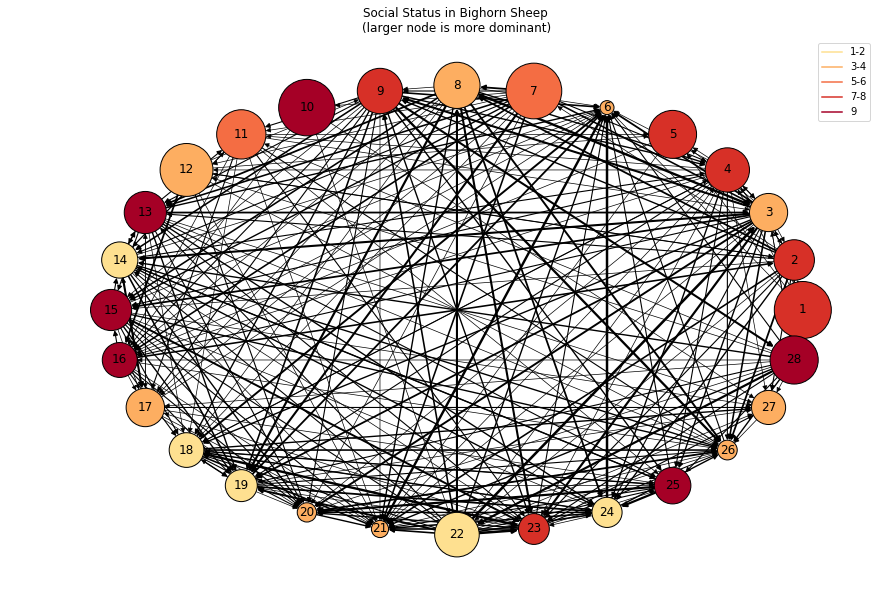

In [20]:
# plt.figure(figsize = (15,10))


# colors = [sheeps[u][v]['color'] for u,v in sheeps.edges()]
weights = [np.log1p(sheeps[u][v]['weight']) for u,v in sheeps.edges()]
# weights = [sheeps[u][v]['weight'] for u,v in sheeps.edges()]

# ages = [sheeps.nodes[i]['age']*200 for i in range(1,29)]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
for label in agesbins:
    ax.plot([0],[0],color=(agecolors[label]),label=label)

# nx.draw(G, pos, edges=sheeps.edges, edge_color=colors, width=weights)
nx.draw_shell(sheeps,with_labels=True, node_color=colormap2,node_size=list(pgrank_invert.values()), edges = sheeps.edges,width=weights)
# ax = plt.gca()
ax.collections[0].set_edgecolor("#000000") 
plt.title('Social Status in Bighorn Sheep \n(larger node is more dominant)')
plt.legend()
plt.show()
# nx.draw_networkx_edges(sheeps,edgelist=sheeps.edges,width=[sheeps.edges[i]['age'] for i in range(1,len(sheeps.edges))])

In [11]:
plt.figure(figsize = (15,10))


# colors = [sheeps[u][v]['color'] for u,v in sheeps.edges()]
weights = [np.log1p(sheeps[u][v]['weight']) for u,v in sheeps.edges()]

nx.draw_shell(sheeps,with_labels=True,node_size=hits_invert.values(), edges = sheeps.edges,width=weights)
# nx.draw_networkx_edges(sheeps,edgelist=sheeps.edges,width=[sheeps.edges[i]['age'] for i in range(1,len(sheeps.edges))])

NameError: name 'hits_invert' is not defined

todo:
age of sheep:  color
elo of sheep: size?. Can't use thsi. use invert_pagerank instead?
distinguish wins from losses (nx.digraph)


In [91]:
sheeps.edges

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 7), (2, 8), (2, 9), (2, 12), (2, 13), (2, 15), (2, 16), (2, 21), (2, 22), (2, 23), (2, 24), (2, 26), (2, 27), (2, 28), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 11), (3, 13), (3, 14), (3, 15), (3, 16), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 28), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 11), (4, 12), (4, 14), (4, 15), (4, 16), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (5, 11), (5, 12), (5, 16), (5, 21), (6, 8), (6, 9), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (6, 21), (6, 22), (6, 23), (6, 24), (6, 25), (6, 26), (6, 28), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (8, 9), (8, 13), (8, 15), (8, 16), (8, 17), (8, 18), (8, 19), (8, 21), (8, 22), (8, 23), (8, 24), (8, 26), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15),

In [100]:
nx.draw_networkx?

In [79]:
sheeps.nodes[1]['age']

8

In [223]:
hubs = nx.hits(sheeps)[0]
authorities = nx.hits(sheeps)[1]
hits_invert = {i:50/(hubs[i]+authorities[i]) for i in range(1,29)}
hits_invert = {i:10/(authorities[i]+0.001) for i in range(1,29)}